In [10]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis
import numpy as np

In [11]:
N = 64
p = 3

sim = AdvectionSolver(
    ic=lambda array_slicer, x, y, z, t, xp: ic.square(
        array_slicer, x, y, z, vy=1, xp=xp
    ),
    ny=N,
    p=p,
    flux_recipe=1,
    ZS=True,
    PAD={"rho": (0, 1)},
    lazy_primitives=True,
)

In [12]:
sim.run(1.0)

Step #82 @ t=1.00e+00 | dt=6.25e-03 | (done)                                                        


In [13]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(0.0), np.float64(1.0))

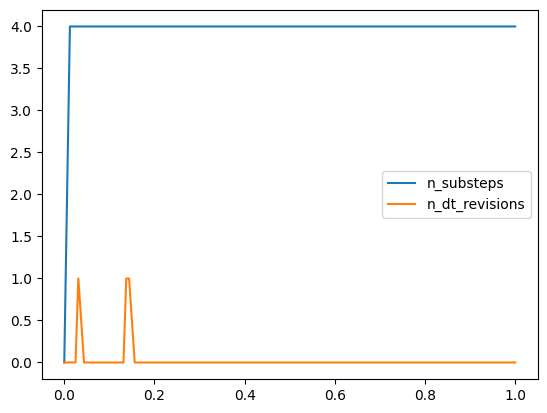

In [14]:
fig, ax = plt.subplots()
vis.plot_timeseries(sim, ax, "n_substeps", label="n_substeps")
vis.plot_timeseries(sim, ax, "n_dt_revisions", label="n_dt_revisions")
ax.legend()

In [15]:
sim.snapshots[0]["u"][0].min()

np.float64(0.0)

rho w
rho w


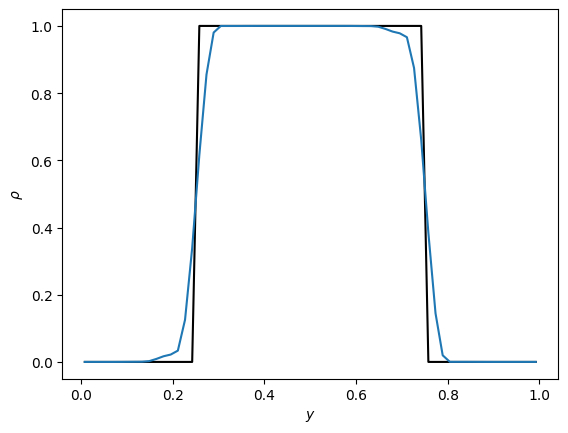

In [16]:
fig, ax = plt.subplots(1, 1)
ax.set_ylabel(r"$\rho$")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, xlabel=True)